In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
df = pd.read_csv('Data/merged_data.csv')

# Check the first few rows to ensure the data is loaded correctly
print(df.head())

   region        date  dis    id  catg  target  cons_level_1_sum  \
0     101  31/12/1994   60     0    11       0             12334   
1     107   29/5/2002   69     1    11       0             20629   
2     301   13/3/1986   62    10    11       0             14375   
3     105   11/7/1996   69   100    11       0                24   
4     303  14/10/2014   62  1000    11       0              9292   

   cons_level_1_mean  cons_level_1_max  cons_level_1_std  ...  \
0         352.400000              1200        310.343472  ...   
1         557.540541              1207        197.935960  ...   
2         798.611111              2400        513.841374  ...   
3           1.200000                15          3.607011  ...   
4         663.714286               800        224.831365  ...   

   cons_level_2_std  cons_level_3_sum  cons_level_3_mean  cons_level_3_max  \
0         43.568935                 0           0.000000                 0   
1          0.000000                 0       

In [41]:
# Extract year & month
df['year'] = pd.to_datetime(df['date'], dayfirst=True).dt.year
df['month'] = pd.to_datetime(df['date'], dayfirst=True).dt.month

# Calculate how long the client has been active (assuming 'date' is the start date)
df['days_active'] = (pd.to_datetime('today', dayfirst=True) - pd.to_datetime(df['date'], dayfirst=True)).dt.days

In [42]:
# Separate features (X) and target (y)
X = df.drop(columns=['date', 'id', 'target'])  # Exclude these columns
y = df['target']  # Target column indicating fraud (1) or non-fraud (0)

In [43]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardised the data (to improve consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# Initialised the Random Forest Classifier with class weight to handle class imbalance
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [45]:
# Feature importance
feature_importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
features = X.columns  # Get feature names
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the most important features
print("Feature Importance:")
print(importance_df)

Feature Importance:
              Feature  Importance
3    cons_level_1_sum    0.092590
6    cons_level_1_std    0.082619
22        days_active    0.080595
19       num_invoices    0.077461
4   cons_level_1_mean    0.076082
5    cons_level_1_max    0.072135
10   cons_level_2_std    0.052273
20               year    0.051448
7    cons_level_2_sum    0.050445
8   cons_level_2_mean    0.050235
0              region    0.048494
9    cons_level_2_max    0.047142
21              month    0.044599
12  cons_level_3_mean    0.026399
11   cons_level_3_sum    0.026260
14   cons_level_3_std    0.024722
1                 dis    0.023720
13   cons_level_3_max    0.020648
15   cons_level_4_sum    0.012880
18   cons_level_4_std    0.012145
17   cons_level_4_max    0.012124
16  cons_level_4_mean    0.011658
2                catg    0.003325


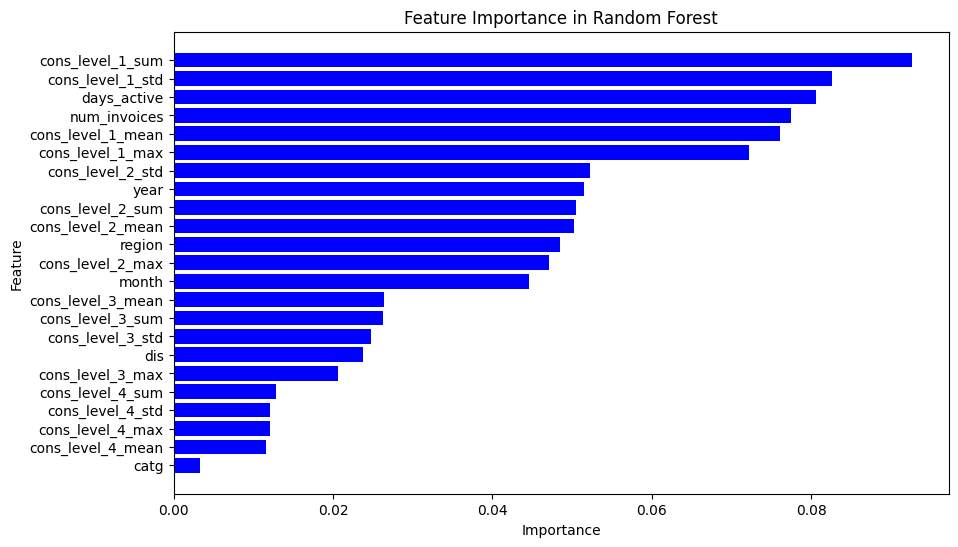

In [46]:
# Plot feature importance for better visualization
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='b')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.show()